In [397]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [552]:
train=pd.read_csv('train.csv')
spray=pd.read_csv('spray.csv')
weather=pd.read_csv('weather.csv')

In [553]:
weather=pd.read_csv('weather.csv')

# Train-dataset

In [554]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [555]:
train.describe()


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [556]:
print train.shape
print train.dtypes

(10506, 12)
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object


In [557]:
#WnvPresent distribution
train.groupby('WnvPresent').size()

WnvPresent
0    9955
1     551
dtype: int64

In [558]:
#dtype conversion
train['Date']=pd.to_datetime(train['Date'])

In [559]:
train.set_index('Date', inplace=True)

In [560]:
train['Month']=train.index.month
train['Day']=train.index.day

In [561]:
train.reset_index(level=0, inplace=True)

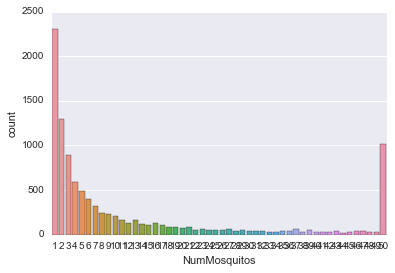

In [562]:
ax = sns.countplot(x="NumMosquitos", data=train)

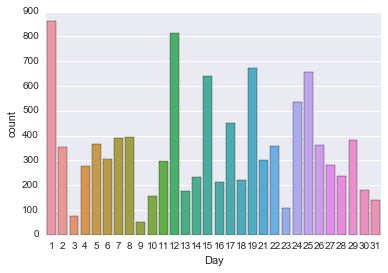

In [563]:
sns.countplot(x='Day', data= train)

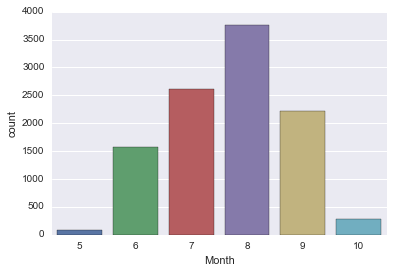

In [564]:
sns.countplot(x='Month', data= train)

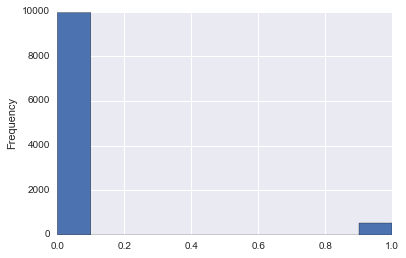

In [565]:
#1=present
train.WnvPresent.plot(kind='hist')

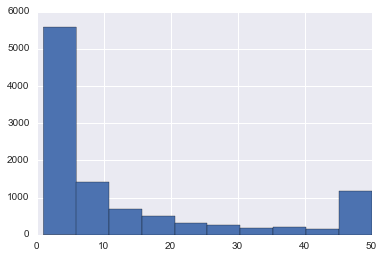

In [566]:
train.NumMosquitos.hist()
plt.show()

In [567]:
train = train.drop(['Block','AddressAccuracy','Address','Street', 'AddressNumberAndStreet','AddressAccuracy'], axis= 1)
train.head(2)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Month,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,5,29
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1,0,5,29


In [568]:
train.columns = map(str.lower, train.columns)

In [569]:
train.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,5,29
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1,0,5,29


In [570]:
_train=train._get_numeric_data()

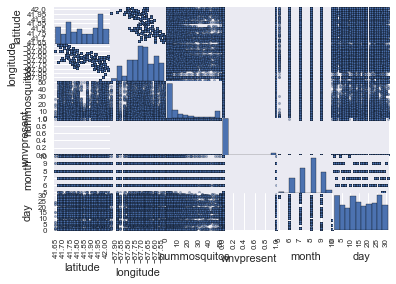

In [571]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(_train)
plt.show()

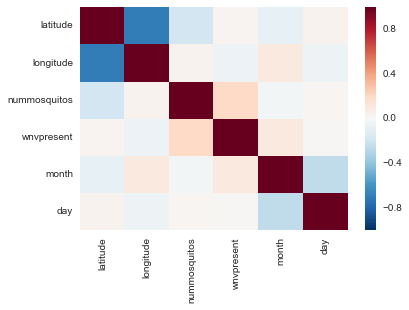

In [414]:
import seaborn as sns
sns.heatmap(train.corr())

In [415]:
train.sort('nummosquitos', ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day
1233,2007-08-01,CULEX PIPIENS,T115,41.673408,-87.599862,50,0,8,1
1406,2007-08-02,CULEX PIPIENS,T138,41.726465,-87.585413,50,0,8,2
4284,2009-06-22,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,50,0,6,22
4285,2009-06-22,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,50,0,6,22
4287,2009-06-22,CULEX PIPIENS/RESTUANS,T900,41.974689,-87.890615,50,0,6,22
1434,2007-08-02,CULEX PIPIENS/RESTUANS,T215,41.686398,-87.531635,50,0,8,2
1433,2007-08-02,CULEX PIPIENS/RESTUANS,T215,41.686398,-87.531635,50,0,8,2
1432,2007-08-02,CULEX PIPIENS/RESTUANS,T215,41.686398,-87.531635,50,0,8,2
1430,2007-08-02,CULEX PIPIENS,T212,41.680946,-87.535198,50,0,8,2
1428,2007-08-02,CULEX PIPIENS,T212,41.680946,-87.535198,50,0,8,2


In [463]:
train.groupby(by=['date','trap','species'])['nummosquitos'].sum()
#x.sort_values('sum', ascending=False)
#x.sum()

date        trap  species
2007-05-29  T002  2           1
                  3           1
            T007  3           1
            T015  2           1
                  3           4
            T045  3           2
            T046  3           1
            T048  2           1
                  3           2
            T049  3           1
            T050  2           1
            T054  2           2
                  3           3
            T086  2           1
                  3           1
            T091  3           1
            T094  3           3
            T096  1           1
                  3           5
            T129  2           1
                  3           2
            T143  2           1
            T148  2           1
            T153  3           1
            T159  3           1
2007-06-05  T002  1           1
                  2           3
                  3           5
            T009  3           2
            T011  3           1
              

In [417]:
train['2dlocation'] = zip(train.latitude, train.longitude)

In [418]:
from math import cos, sin, sqrt, atan2, radians

st1 = (radians(41.995), radians(- 87.933))
st2 = (radians(41.186), radians(- 87.752))

def calculate_distance_from_location(location, lat, lon):
    """ 
    location is a tuple of a station
    lat and lon are locations used to measure distance from station
    """
    
    # approximate radius of earth in km
    R = 6373.0
    
    dlat = location[0] - lat
    dlon = location[1] - lon
    
    a = sin(dlat / 2)**2 + cos(lat) * cos(location[0]) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance

dist_from_st1 = []
dist_from_st2 = []

for row in train['2dlocation']:
    #import pdb; pdb.set_trace()
    _lat = radians(row[0])
    _lon = radians(row[1])
    
    dist_from_st1.append(calculate_distance_from_location(location=st1, lat=_lat, lon=_lon))
    dist_from_st2.append(calculate_distance_from_location(location=st2, lat=_lat, lon=_lon))
    
#print dist_from_st1[0], dist_from_st2[0]

In [419]:
train['dist_st1']=dist_from_st1
train['dist_st2']=dist_from_st2

In [420]:
train.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day,2dlocation,dist_st1,dist_st2
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395


In [421]:
def station(station1,station2):
    if station1 < station2:
        return 1
    return 2
Station=[]

for index, row in train.iterrows():
    
    Station.append(station(station1=dist_st1, station2=dist_st2))

In [422]:
train['Station']=Station

In [423]:
train.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day,2dlocation,dist_st1,dist_st2,Station
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395,1
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395,1


In [424]:
train['Station'].unique()

array([1])

In [425]:
train.species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [426]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
train.iloc[:,1]=le.fit_transform(train.iloc[:,1])

In [453]:
train.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day,2dlocation,dist_st1,dist_st2,Station
0,2007-05-29,2,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395,1
1,2007-05-29,3,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,85.598395,1


In [ ]:
df.sum(axis=1)

# Spray dataset

In [428]:
#spray.head(2)

In [429]:
#spray.describe()

In [430]:
#print spray.shape
#print spray.dtypes

In [431]:
#print spray.isnull().sum()

In [432]:
#sns.pairplot(spray)

# Weather dataset

In [433]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [434]:
weather=weather[weather.Station != 2]

In [435]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,1472.0,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,1.0,75.97894,56.730978,53.377717,6.987092,17.656250
std,0.0,11.50315,10.347907,10.670263,3.586353,10.222077
min,1.0,42.00000,29.000000,22.000000,0.100000,1.000000
25%,1.0,68.00000,49.000000,46.000000,4.400000,7.000000
50%,1.0,78.00000,58.000000,54.000000,6.400000,19.500000
75%,1.0,85.00000,65.000000,61.250000,9.100000,26.000000
max,1.0,103.00000,82.000000,75.000000,24.100000,36.000000


In [436]:
print weather.shape
print weather.dtypes

(1472, 22)
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


In [437]:
for col in weather:
    print weather[col].unique()

[1]
['2007-05-01' '2007-05-02' '2007-05-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
[ 83  59  66  68  82  77  84  70  64  69  90  80  62  71  87  89  88  65
  75  79  78  85  81  91  86  93  76  67  92  74  94  61  73  54  56  72
  60  58  55  57  50  63  52  53  47  45  51  48  44  46  49  96  95  99
  97 100  98 102 103  42]
[50 42 46 49 53 47 54 61 56 51 43 57 44 55 60 63 66 65 62 58 71 52 64 70 69
 67 75 68 74 72 73 59 45 39 41 40 37 34 48 38 35 33 31 32 77 29 36 78 80 76
 79 82 81]
['67' '51' '56' '58' '60' '59' '65' '68' '69' '70' '61' '55' '73' '53' '57'
 '62' '71' '75' '76' '63' '66' '74' '77' '72' '81' '80' '79' '85' '82' '78'
 '64' '50' '49' '46' '45' '54' '52' '48' '47' '44' '40' '38' '42' '83' '84'
 '37' '41' '43' '86' '87' '88' '91' '93' '89' '36' '39']
['14' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8' '-5'
 ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16' '22'
 '21' '20' '-10' '-16' '17' '-12' '-11' '-15' '-17' '19' '-13' '23']


In [438]:
weather.Date=pd.to_datetime(weather.Date)

In [439]:
print weather.SnowFall.value_counts()

0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64


In [440]:
weather=weather.drop(['Depth','Water1','SnowFall'], axis=1)

In [441]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4


In [442]:
for col in weather[['WetBulb','SeaLevel','StnPressure','PrecipTotal']]:
    weather[col]=pd.to_numeric(weather[col], errors=coerce)
for col in weather[['Tavg','Sunrise','Sunset','Tavg','Depart','Heat','Cool']]:
    weather[col]=weather[col].astype(int)
weather.AvgSpeed=weather.AvgSpeed.astype(float)
    

In [530]:
le = preprocessing.LabelEncoder()
label_encoder=le.fit_transform(weather.iloc[:,12])


In [529]:
label_encoder

array([38, 65, 68, ..., 62, 65, 76])

In [444]:
print weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
Depart                  int64
DewPoint                int64
WetBulb               float64
Heat                    int64
Cool                    int64
Sunrise                 int64
Sunset                  int64
CodeSum                 int64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object


In [445]:
# fill null values with the mean of each column
weather.WetBulb=weather.WetBulb.fillna(int(weather.WetBulb.mean()))
weather.PrecipTotal=weather.PrecipTotal.fillna(int(weather.PrecipTotal.mean()))
weather.StnPressure=weather.StnPressure.fillna(int(weather.StnPressure.mean()))
weather.SeaLevel=weather.SeaLevel.fillna(int(weather.SeaLevel.mean()))

In [446]:
weather.describe()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,1472.0,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,1.0,75.97894,56.730978,66.606658,1.954484,53.377717,59.036005,3.631114,5.237772,480.646739,1847.347826,10.816576,0.134538,29.253859,29.969497,6.987092,17.656250,8.570788
std,0.0,11.50315,10.347907,10.511437,6.841110,10.670263,9.314181,6.133829,5.899382,65.344729,87.050615,16.936770,0.421066,0.156321,0.167775,3.586353,10.222077,3.187250
min,1.0,42.00000,29.000000,36.000000,-17.000000,22.000000,32.000000,0.000000,0.000000,416.000000,1647.000000,0.000000,0.000000,28.550000,29.000000,0.100000,1.000000,1.900000
25%,1.0,68.00000,49.000000,60.000000,-3.000000,46.000000,53.000000,0.000000,0.000000,424.750000,1792.250000,0.000000,0.000000,29.160000,29.880000,4.400000,7.000000,6.200000
50%,1.0,78.00000,58.000000,68.000000,2.000000,54.000000,60.000000,0.000000,3.000000,446.500000,1859.500000,0.000000,0.000000,29.260000,29.970000,6.400000,19.500000,8.100000
75%,1.0,85.00000,65.000000,75.000000,7.000000,61.250000,66.000000,5.000000,10.000000,531.250000,1922.250000,17.000000,0.060000,29.350000,30.070000,9.100000,26.000000,10.400000
max,1.0,103.00000,82.000000,93.000000,23.000000,75.000000,78.000000,29.000000,28.000000,623.000000,1931.000000,66.000000,6.860000,29.790000,30.520000,24.100000,36.000000,26.300000


Station :
NormaltestResult(statistic=masked, pvalue=1.0)


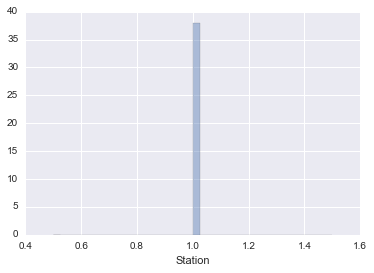


Tmax :
NormaltestResult(statistic=4.8173179350981501, pvalue=0.089935820593448693)


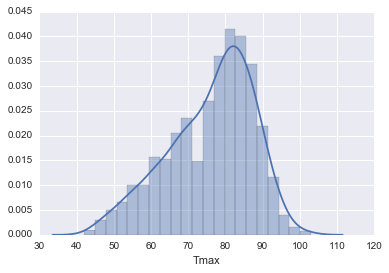


Tmin :
NormaltestResult(statistic=2.9959522799551928, pvalue=0.22358220163940062)


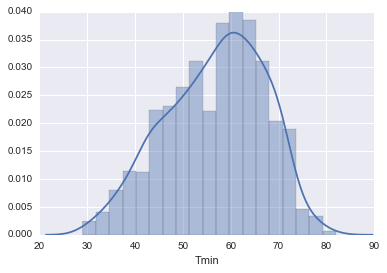


Tavg :
NormaltestResult(statistic=4.2278119330949506, pvalue=0.12076533862729889)


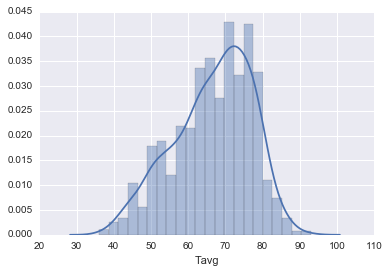


Depart :
NormaltestResult(statistic=0.95001057797199107, pvalue=0.62188176733236378)


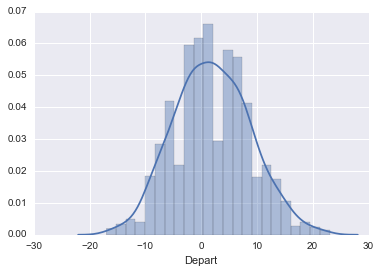


DewPoint :
NormaltestResult(statistic=5.6707361345499407, pvalue=0.058696917442993046)


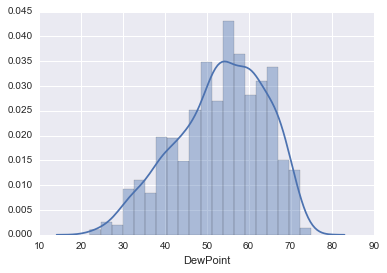


WetBulb :
NormaltestResult(statistic=5.3647976671686193, pvalue=0.068398879669796783)


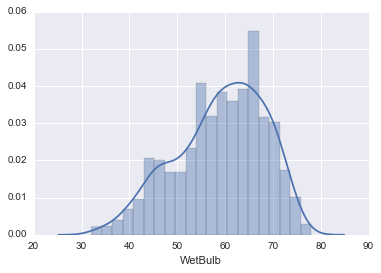


Heat :
NormaltestResult(statistic=40.651828250938692, pvalue=1.4878791422068531e-09)


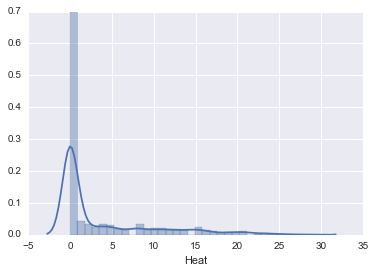


Cool :
NormaltestResult(statistic=7.2338098037560661, pvalue=0.02686569992090242)


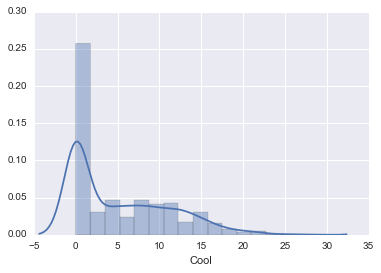


Sunrise :
NormaltestResult(statistic=9.4124691262332583, pvalue=0.009038748421459129)


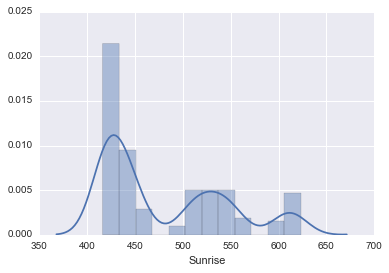


Sunset :
NormaltestResult(statistic=12.544701824670639, pvalue=0.0018877853445710923)


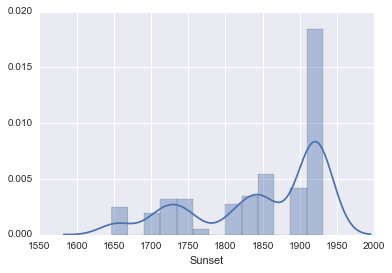


CodeSum :
NormaltestResult(statistic=15.709288534146699, pvalue=0.00038794605284257766)


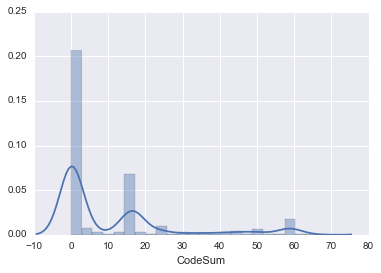


PrecipTotal :
NormaltestResult(statistic=63.244136271683033, pvalue=1.8480354687375767e-14)


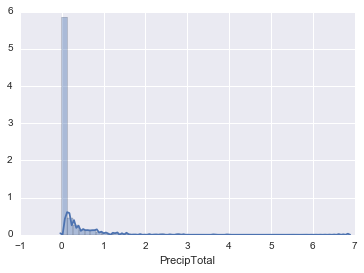


StnPressure :
NormaltestResult(statistic=0.72162575213767666, pvalue=0.69710943212025134)


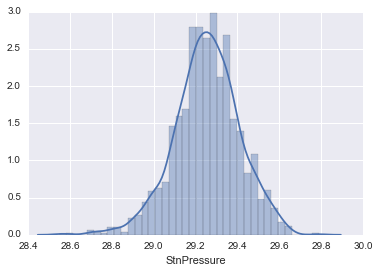


SeaLevel :
NormaltestResult(statistic=0.50763488339519014, pvalue=0.77583342395178101)


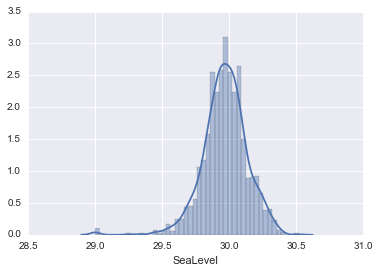


ResultSpeed :
NormaltestResult(statistic=5.2384858905692777, pvalue=0.072857999446116095)


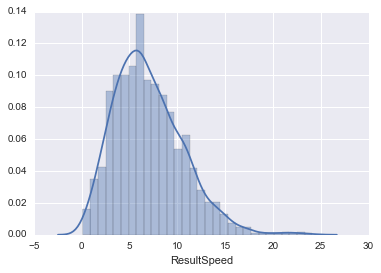


ResultDir :
NormaltestResult(statistic=10.115137588618248, pvalue=0.0063610056420590373)


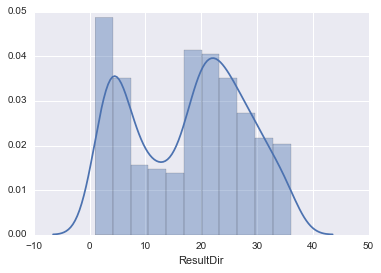


AvgSpeed :
NormaltestResult(statistic=4.4495066239965615, pvalue=0.1080940808588734)


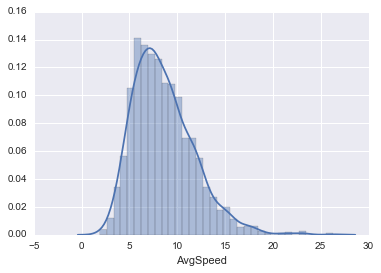

In [448]:
import scipy
import matplotlib.pyplot as plt
for i in weather.drop('Date', axis=1):
    rand_sample = weather[i].sample(50, random_state=6)
    print i,':\n', scipy.stats.mstats.normaltest(rand_sample)
    sns.distplot(weather[i])
    plt.xlabel(i)
    plt.show()
    print

In [449]:
weather=weather.drop(['PrecipTotal','CodeSum','Heat'], axis=1)

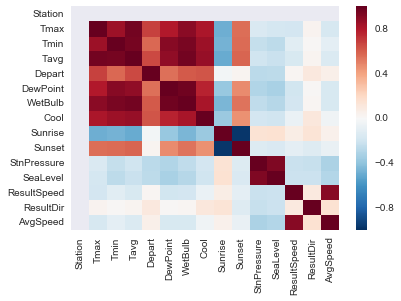

In [455]:
import seaborn as sns
sns.heatmap(weather.corr())

In [475]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,date
0,1,2007-05-01,83,50,67,14,51,56.0,2,448,1849,29.10,29.82,1.7,27,9.2,2007-05-01
2,1,2007-05-02,59,42,51,-3,42,47.0,0,447,1850,29.38,30.09,13.0,4,13.4,2007-05-02


In [474]:
train.head(2)
weather['date']= weather.Date

In [477]:
weather['date'] = pd.to_datetime(weather.date)

In [479]:
weather.set_index('date', inplace=True)
train.set_index('date', inplace=True)

In [518]:
df= train.join(weather, lsuffix='_')
df.head(2)

,species,trap,latitude,longitude,nummosquitos,wnvpresent,month,day,2dlocation,dist_st1,...,DewPoint,WetBulb,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,2,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,...,58,65.0,9,421,1917,29.39,30.11,5.8,18,6.5
2007-05-29,3,T002,41.95469,-87.800991,1,0,5,29,"(41.95469, -87.800991)",11.801095,...,58,65.0,9,421,1917,29.39,30.11,5.8,18,6.5


In [519]:
df.columns

Index([u'species', u'trap', u'latitude', u'longitude', u'nummosquitos',
       u'wnvpresent', u'month', u'day', u'2dlocation', u'dist_st1',
       u'dist_st2', u'Station_', u'Station', u'Date', u'Tmax', u'Tmin',
       u'Tavg', u'Depart', u'DewPoint', u'WetBulb', u'Cool', u'Sunrise',
       u'Sunset', u'StnPressure', u'SeaLevel', u'ResultSpeed', u'ResultDir',
       u'AvgSpeed'],
      dtype='object')

In [520]:
df=df.drop(['2dlocation','dist_st1','dist_st2','Station_','Station'], axis=1)

In [521]:
df.groupby(by='wnvpresent').describe()

AvgSpeed         Cool       Depart     DewPoint  \
wnvpresent                                                             
0          count  9955.000000  9955.000000  9955.000000  9955.000000   
           mean      7.453169     8.410045     2.655650    59.593872   
           std       2.572478     5.711662     6.539716     7.816904   
           min       2.100000     0.000000   -12.000000    39.000000   
           25%       5.600000     4.000000    -2.000000    54.000000   
           50%       7.100000     9.000000     4.000000    60.000000   
           75%       9.400000    13.000000     8.000000    67.000000   
           max      15.000000    19.000000    18.000000    73.000000   
1          count   551.000000   551.000000   551.000000   551.000000   
           mean      7.109437     9.909256     4.268603    62.753176   
           std       2.256244     4.621976     5.208428     6.520796   
           min       2.100000     0.000000   -12.000000    40.000000   
           25%       5.700000     7.000000     0.000000    58.000000   
           50%       6.600000    10.000000     5.000000    64.000000   
           75%       9.300000    13.000000     8.000000    67.000000   
           max      14.000000    19.000000    18.000000    73.000000   

                    ResultDir  ResultSpeed     SeaLevel  StnPressure  \
wnvpresent                                                             
0          count  9955.000000  9955.000000  9955.000000  9955.000000   
           mean     17.502361     6.010799    29.966803    29.250198   
           std       9.528553     2.848231     0.117165     0.116877   
           min       1.000000     0.100000    29.600000    28.890000   
           25%       8.000000     3.850000    29.890000    29.170000   
           50%      19.000000     5.500000    29.980000    29.260000   
           75%      25.000000     7.800000    30.050000    29.340000   
           max      36.000000    14.600000    30.330000    29.590000   
1          count   551.000000   551.000000   551.000000   551.000000   
           mean     17.840290     5.359165    29.969728    29.255844   
           std       9.167328     2.584918     0.093413     0.092178   
           min       1.000000     0.100000    29.630000    28.910000   
           25%       9.000000     3.600000    29.910000    29.210000   
           50%      20.000000     4.700000    29.980000    29.260000   
           75%      24.000000     7.000000    30.010000    29.290000   
           max      36.000000    13.300000    30.330000    29.590000   

                      Sunrise       Sunset         Tavg         Tmax  \
wnvpresent                                                             
0          count  9955.000000  9955.000000  9955.000000  9955.000000   
           mean    467.330588  1871.871924    72.413561    81.749573   
           std      45.802861    63.964897     7.607183     8.364587   
           min     416.000000  1720.000000    50.000000    57.000000   
           25%     427.000000  1834.000000    69.000000    78.000000   
           50%     446.000000  1910.000000    74.000000    83.000000   
           75%     513.000000  1925.000000    78.000000    88.000000   
           max     557.000000  1931.000000    84.000000    96.000000   
1          count   551.000000   551.000000   551.000000   551.000000   
           mean    488.813067  1852.473684    74.642468    83.626134   
           std      34.029285    42.761141     5.404807     6.272738   
           min     419.000000  1729.000000    52.000000    58.000000   
           25%     452.000000  1832.000000    72.000000    80.000000   
           50%     505.000000  1845.000000    75.000000    83.000000   
           75%     514.000000  1903.000000    78.000000    89.000000   
           max     552.000000  1931.000000    84.000000    96.000000   

                         Tmin      WetBulb          day     latitude  \
wnvpresent                                                

In [522]:
cols=list(df.columns.values)
cols.pop(cols.index('wnvpresent'))
df=df[cols + ['wnvpresent']]
df.head(2)

,species,trap,latitude,longitude,nummosquitos,month,day,Date,Tmax,Tmin,...,WetBulb,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,wnvpresent
date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,2,T002,41.95469,-87.800991,1,5,29,2007-05-29,88,60,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0
2007-05-29,3,T002,41.95469,-87.800991,1,5,29,2007-05-29,88,60,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0


In [523]:
#create final dataframe for modeling and convert to csv
df.reset_index(level=0, inplace=True)
df=df.drop(['Date','trap','date'], axis=1)

In [524]:
df.to_csv('df.csv')

In [525]:
df.head()

,species,latitude,longitude,nummosquitos,month,day,Tmax,Tmin,Tavg,Depart,...,WetBulb,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,wnvpresent
0,2,41.954690,-87.800991,1,5,29,88,60,74,10,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0
1,3,41.954690,-87.800991,1,5,29,88,60,74,10,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0
2,3,41.994991,-87.769279,1,5,29,88,60,74,10,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0
3,2,41.974089,-87.824812,1,5,29,88,60,74,10,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0
4,3,41.974089,-87.824812,4,5,29,88,60,74,10,...,65.0,9,421,1917,29.39,30.11,5.8,18,6.5,0


# RoadMap

1. Data Preperation:
    - Data Cleaning ( rename columns, deal with null values, data concatenation ...)
    - Perform Data Exploration
    - PCA
2. Hypothesis/Modeling:
    - Perform Different types of Modeling
    - use RMSE and other evaluation metrics
3. Interpret Results
    